# Generate MetaData for Species Audio Files

This program is designed to create comprehensive metadata for audio files within a specified directory. It executes this task through a series of well-defined steps:

1. Calculate Audio Duration (CalcAudioDuration):
This function calculates the duration of audio files in seconds, given the length of the audio in milliseconds. It performs the conversion from milliseconds to seconds and returns the duration.

2. Compute Audio Duration (ComputeAudioDuration):
This function retrieves the duration of audio files by analysing their file formats (e.g., '.wav' or '.mp3'). It validates the file's format, loads the audio file, calculates its length, and uses CalcAudioDuration to obtain the duration in seconds. Any errors encountered during this process are captured and displayed.

3. Extract Class and File Information (ExtractClassAndFile):
This function extracts class names and filenames from subdirectories within a specified directory. It iterates through subdirectories, collecting class and filename information, along with file sizes.

4. Get Audio Durations (GetAudioDurations):
This function calculates the durations of audio files within the specified directory. It utilises the ComputeAudioDuration function to process each audio file, aggregating the durations into a list.

5. Create Metadata (CreateMetaData):
This function generates comprehensive metadata for the audio files. It combines class names, filenames, file sizes, and durations into a Pandas DataFrame and returns this structured metadata.

6. Write Metadata to CSV (WriteMetadata):
This function writes the metadata DataFrame to a CSV file named 'species_metadata.csv' within the specified directory.

To use the program, set the 'path' variable to point to the directory containing the audio files. Subsequently, invoke the 'WriteMetadata' function to generate and store the metadata as a CSV file. This ensures that the audio file durations are accurately calculated and incorporated into the metadata, facilitating further analysis or use.

Additionally, the program includes data visualisation and analysis, such as bar plots, box plots, and outlier identification, to offer insights into the distribution of audio files' properties, such as the number of files and their durations across different classes or categories. These visualisations provide valuable information for understanding the dataset's characteristics and identifying potential outliers.

In summary, this program streamlines the process of creating metadata for audio datasets, enhancing their usability for a wide range of applications, including machine learning, data analysis, and content management.

In [1]:
# Import the libraries
import os
from pydub import AudioSegment
import pandas as pd

In [2]:
# Import the libraries
import os
from pydub import AudioSegment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
# Functions to compute and generate csv file

def CalcAudioDuration(length):
    """
    Function to compute the duration. You could add more features like hours and minutes here, 
    but for now it would just be seconds.
    """
    seconds = length / 1000  # Convert milliseconds to seconds
    return seconds

def ComputeAudioDuration(filename):
    """
    This function will retrieve the duration from any file passed to it
    """
    try:
        ext = os.path.splitext(filename)[-1].lower()
        if ext not in ['.wav', '.mp3']:
            raise ValueError("Unsupported audio format")

        audio = AudioSegment.from_file(filename)
        length = len(audio)
        seconds = CalcAudioDuration(length)
        return seconds
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

def ExtractClassAndFile(path):
    classes = []
    filenames = []
    # sizes are in bytes
    filesizes = []
    classsizes = []
    for folder in os.listdir(path):
        folderpath = os.path.join(path, folder)
        if os.path.isdir(folderpath):
            for file in os.listdir(folderpath):
                classsizes.append(os.path.getsize(folderpath))
                filesizes.append(os.path.getsize((folderpath+'//'+file)))
                if file.endswith(('.wav', '.mp3')):
                    classes.append(folder)
                    filenames.append(file)
    return classes, filenames, filesizes, classsizes

def GetAudioDurations(path, classes, filenames):
    seconds = []
    for cls, filename in zip(classes, filenames):
        filepath = os.path.join(path, cls, filename)
        second = ComputeAudioDuration(filepath)
        seconds.append(second)
    return seconds

def ComputeClassDetails(meta_data_df):
    
    """This function that will calculate the total number of files in the folder/class
        and also their total duration in HH:MM:SS format"""
    
    result_df = meta_data_df.groupby('Class').agg(
        {'Filename': 'count', 'Seconds': 'sum'}
    ).reset_index()
    result_df.rename(columns={'Filename': 'No. of Samples'}, inplace=True)
    result_df['Seconds'] = result_df['Seconds'].round().astype(int)
    result_df['Total Duration'] = pd.to_timedelta(result_df['Seconds'], unit='s').apply(lambda x: str(x).split()[-1])
    result_df = result_df.drop(columns=['Seconds'])
    return result_df

# Function to create metadata table
def CreateMetaData(path):
    classes, filenames, filesizes, classsizes = ExtractClassAndFile(path)
    seconds = GetAudioDurations(path, classes, filenames)
    feature_colname = ['filename', 'seconds', 'class']
    df = pd.DataFrame({'Class': classes, 'Filename': filenames, 'Filesize': filesizes, 'Seconds': seconds, 'Filesize_by_class': classsizes})
    df['Seconds'] = df['Seconds'].fillna(0)
    df1 = df.groupby('Class').agg({'Filename': 'count', 'Seconds': 'sum'}).reset_index()
    df1.rename(columns={'Filename': 'Total_samples_by_class'}, inplace=True)
    df1['Seconds'] = df1['Seconds'].round().astype(int)
    df1['Total_duration_by_class'] = pd.to_timedelta(df1['Seconds'], unit='s').apply(lambda x: str(x).split()[-1])
    df1 = df1.drop(columns=['Seconds'])
    df_join = pd.merge(df, df1, on='Class', how='inner')
    return df_join

# Function to write csv
def WriteMetadata(path):
    df = CreateMetaData(path)
    df.to_csv(os.path.join(path, 'species_metadata.csv'), index=False)

# Assign the path as required
path = r""

# Create metadata df
df = CreateMetaData(path)

In [15]:
print("The metadata of given directory is: \n")
pd.read_csv('add your path here/species_metadata.csv').head()

The metadata of given directory is: 



,Class,Filename,Filesize,Seconds,Filesize_by_class,Total_samples_by_class,Total_duration_by_class,Seconds_by_class_mean,Seconds_by_class_min,Seconds_by_class_max
0,Acanthiza chrysorrhoa,region_34.000-36.000.mp3,33069,2.029,6912,214,00:06:42,1.877692,0.51,2.052
1,Acanthiza chrysorrhoa,region_11.750-13.750.mp3,33405,2.052,6912,214,00:06:42,1.877692,0.51,2.052
2,Acanthiza chrysorrhoa,region_15.200-16.050.mp3,14637,0.877,6912,214,00:06:42,1.877692,0.51,2.052
3,Acanthiza chrysorrhoa,region_29.050-31.050.mp3,33405,2.052,6912,214,00:06:42,1.877692,0.51,2.052
4,Acanthiza chrysorrhoa,region_10.150-12.150.mp3,33069,2.029,6912,214,00:06:42,1.877692,0.51,2.052


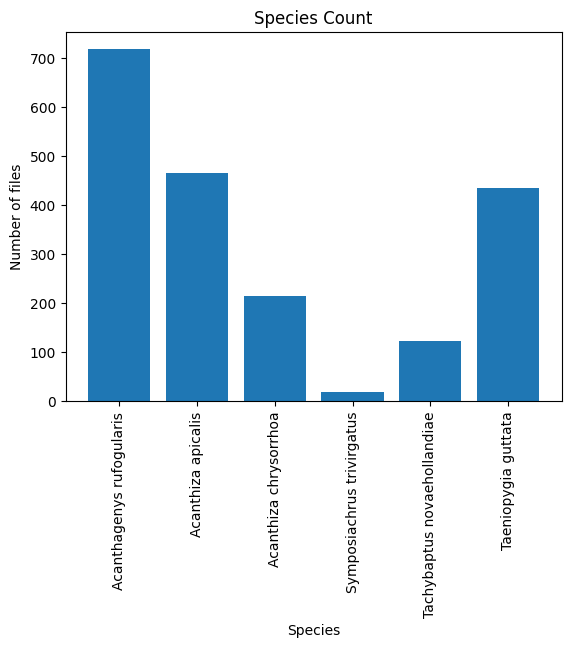

In [18]:
# Bar plot for number of classes

plt.bar(pd.unique(df.sort_values(by=['Class'])['Class']), pd.unique(df.sort_values(by=['Class'])['Total_samples_by_class']))
plt.xlabel("Species")
plt.ylabel("Number of files")
plt.title("Species Count")
plt.xticks(rotation=90)
plt.show()

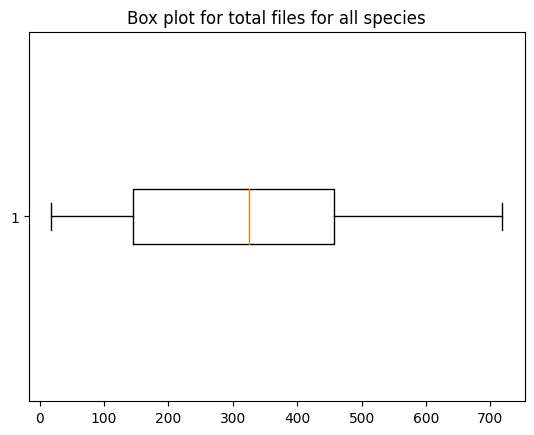


Outlier-Classes - The class which are extreme in number of samples are: 

  Symposiachrus trivirgatus
Tachybaptus novaehollandiae
      Acanthiza chrysorrhoa
        Taeniopygia guttata
         Acanthiza apicalis
   Acanthagenys rufogularis


In [19]:
# Box plot for total files for all species

df_filecount = df.groupby(by="Class").count().reset_index()[['Class', 'Filename']].rename(columns = {'Filename' : 'Count'}).sort_values('Count')

# Creating plot
plt.boxplot(df_filecount['Count'], vert= False)
plt.title("Box plot for total files for all species")

# show plot
plt.show()

# Code to spot outliers

q1 = np.percentile(df_filecount['Count'], 25)
q3 = np.percentile(df_filecount['Count'], 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = np.where((df_filecount['Count']< q1 - threshold) | (df_filecount['Count']< q3 + threshold))

print("\nOutlier-Classes - The class which are extreme in number of samples are: \n")
print(df_filecount[df_filecount.index.isin(list(outliers[0]))]['Class'].to_string(index=False))


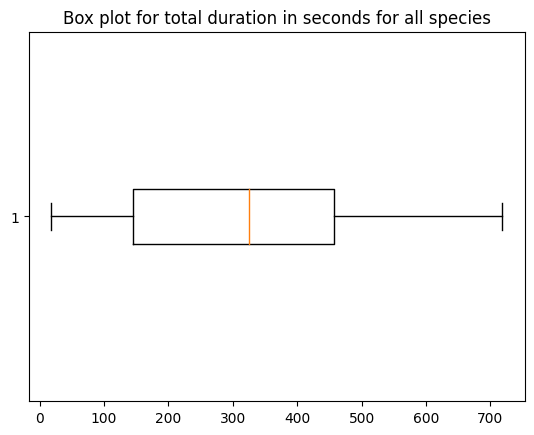


Outlier-Classes - The class which are extreme in number of samples are: 

  Symposiachrus trivirgatus
Tachybaptus novaehollandiae
      Acanthiza chrysorrhoa
        Taeniopygia guttata
         Acanthiza apicalis
   Acanthagenys rufogularis


In [20]:
# Box plot for total seconds for all species

df_total_seconds = df.groupby(by="Class").count().reset_index()[['Class', 'Seconds']].rename(columns = {'Seconds' : 'Count'}).sort_values('Count')

# Creating plot
plt.boxplot((df_total_seconds['Count']), vert= False)
plt.title("Box plot for total duration in seconds for all species")

# show plot
plt.show()

# Code to spot outliers

q1 = np.percentile(df_total_seconds['Count'], 25)
q3 = np.percentile(df_total_seconds['Count'], 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = np.where((df_total_seconds['Count']< q1 - threshold) | (df_total_seconds['Count']< q3 + threshold))

print("\nOutlier-Classes - The class which are extreme in number of samples are: \n")
print(df_total_seconds[df_total_seconds.index.isin(list(outliers[0]))]['Class'].to_string(index=False))

In [21]:
# Summary stats about number of files per species

# Minimum
min_count = min(df_filecount['Count'])
min_count_species = df_filecount[df_filecount['Count']==min_count]['Class'].to_string(index=False)
print(f"The minimum file count is: {min_count} for the species: {min_count_species}")

# Maximum
max_count = max(df_filecount['Count'])
max_count_species = df_filecount[df_filecount['Count']==max_count]['Class'].to_string(index=False)
print(f"\nThe maximum file count is: {max_count} for the species: {max_count_species}")

# Mean
print(f"\nThe mean value of number of files is :{(df_filecount['Count']).mean()}")

The minimum file count is: 18 for the species: Symposiachrus trivirgatus

The maximum file count is: 718 for the species: Acanthagenys rufogularis

The mean value of number of files is :328.8333333333333


In [22]:
# Summary stats about duration of files per species

df_duration_summary = (df.groupby('Class').agg({'Seconds': ['mean', 'min', 'max']}))\
                      .droplevel(0, axis = 1).reset_index().rename(columns= {'mean':'Seconds_by_class_mean', \
                      'min':'Seconds_by_class_min', 'max':'Seconds_by_class_max'})

df_final = pd.merge(df, df_duration_summary, on ='Class', how = 'inner')
df_final.head()

,Class,Filename,Filesize,Seconds,Filesize_by_class,Total_samples_by_class,Total_duration_by_class,Seconds_by_class_mean,Seconds_by_class_min,Seconds_by_class_max
0,Taeniopygia guttata,region_34.000-36.000.mp3,33069,2.029,13984,435,00:13:22,1.844032,0.589,2.052
1,Taeniopygia guttata,region_39.000-39.750.mp3,13101,0.781,13984,435,00:13:22,1.844032,0.589,2.052
2,Taeniopygia guttata,region_125.500-127.500.mp3,33069,2.029,13984,435,00:13:22,1.844032,0.589,2.052
3,Taeniopygia guttata,region_41.950-42.700.mp3,13101,0.781,13984,435,00:13:22,1.844032,0.589,2.052
4,Taeniopygia guttata,region_320.450-322.050.mp3,26925,1.645,13984,435,00:13:22,1.844032,0.589,2.052


In [23]:
# Write to csv file

df_final.to_csv(os.path.join(path, 'species_metadata.csv'), index=False)

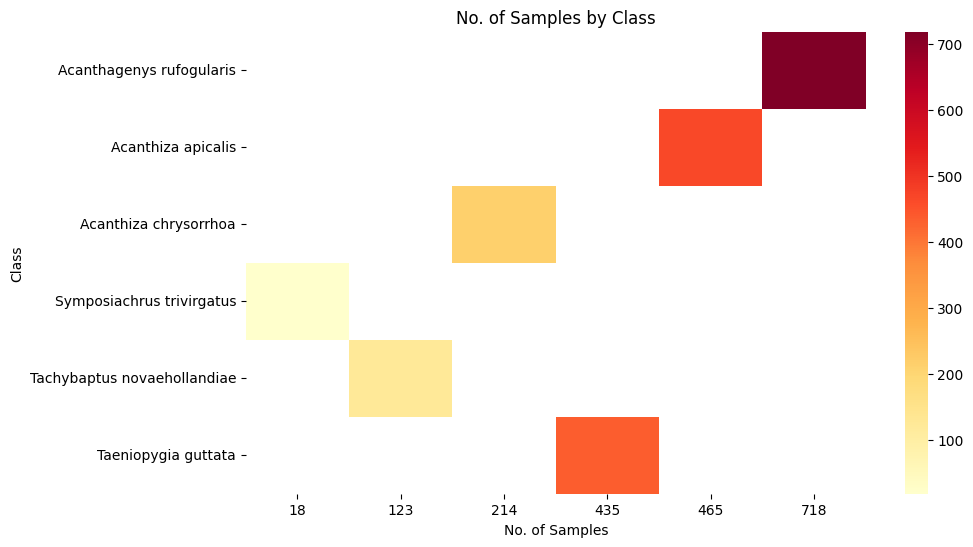

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

result_df = ComputeClassDetails(df_final)
# Pivot the dataframe to create a heatmap for No. of Samples
heatmap_samples = result_df.pivot(index='Class', columns='No. of Samples', values='No. of Samples')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_samples, annot=False, cmap='YlOrRd')
plt.title('No. of Samples by Class')
plt.show()